<a href="https://colab.research.google.com/github/Gaurav-phatkare/Classification-Models-Tensorflow/blob/main/Binary_classification_models_dog_%26_Cat_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [9]:
!ls "/content/drive/MyDrive/CatsAndDogsDS/"

cat_dog  cat_dog_split	cats  dogs


In [10]:
!chdir "/content/drive/MyDrive/CatsAndDogsDS/"

/bin/bash: line 1: chdir: command not found


In [11]:
import os
os.chdir("/content/drive/MyDrive/CatsAndDogsDS/")

In [12]:
os.environ['KAGGLE_USERNAME'] = "gauravphatkare"
os.environ['KAGGLE_KEY'] = "48e510c8b00f0155375c3605c916efd5"

In [13]:
!kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification

 98% 532M/545M [00:06<00:00, 108MB/s] 
100% 545M/545M [00:06<00:00, 91.5MB/s]


In [ ]:
# !kaggle datasets download -d ashfakyeafi/cat-dog-images-for-classification

In [ ]:
!unzip /content/drive/MyDrive/CatsAndDogsDS/cat-dog-images-for-classification.zip

In [16]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/CatsAndDogsDS/cat_dog.csv")

In [17]:
df.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [ ]:
!ls /content/drive/MyDrive/CatsAndDogsDS/cat_dog/

In [19]:
df.image[0]

'dog.11289.jpg'

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

random_image = random.sample(os.listdir("/content/drive/MyDrive/CatsAndDogsDS/dogs"),1)

img = mpimg.imread("/content/drive/MyDrive/CatsAndDogsDS/dogs" + "/" + random_image[0])
plt.imshow(img)

plt.title('dog')

plt.axis("off")



ValueError: ignored

In [21]:
import os
import shutil

def classify_images_by_prefix(source_folder, destination_folder1, destination_folder2, prefix1, prefix2):
    for filename in os.listdir(source_folder):
        if filename.endswith(".jpg"):
            if filename.startswith(prefix1):
                source_path = os.path.join(source_folder, filename)
                destination_path = os.path.join(destination_folder1, filename)
                shutil.copyfile(source_path, destination_path)
            elif filename.startswith(prefix2):
                source_path = os.path.join(source_folder, filename)
                destination_path = os.path.join(destination_folder2, filename)
                shutil.copyfile(source_path, destination_path)

# Example usage:
source_folder = "/content/drive/MyDrive/CatsAndDogsDS/cat_dog"
destination_folder_cat = "/content/drive/MyDrive/CatsAndDogsDS/cats"
destination_folder_dog = "/content/drive/MyDrive/CatsAndDogsDS/dogs"
prefix_cat = "cat"
prefix_dog = "dog"

classify_images_by_prefix(source_folder, destination_folder_cat, destination_folder_dog, prefix_cat, prefix_dog)

# source_folder = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog'
# destination_folder1 = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog/cats/'
# destination_folder2 = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog/dogs/'
# class1 = 'cat'
# class2 = 'dog'

# classify_images(source_folder, destination_folder1, destination_folder2, class1, class2)

In [ ]:
import os

source_folder = "/content/drive/MyDrive/CatsAndDogsDS/cat_dog/cats/"
print(os.path.exists(source_folder))

False


In [23]:
import os
import random
import shutil

def split_data(source_folder, train_folder, test_folder, train_ratio = 0.8):

    image_files = [file for file in os.listdir(source_folder) if file.endswith(".jpg")]

    num_train = int(len(image_files) * train_ratio)
    num_test = len(image_files) - num_train

    random.shuffle(image_files)


    for file in image_files[:num_train]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(train_folder, file)
        shutil.copyfile(source_path, destination_path)

    for file in image_files[num_train:]:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(test_folder, file)
        shutil.copyfile(source_path, destination_path)


source_folder_cat = '/content/drive/MyDrive/CatsAndDogsDS/cats'
source_folder_dog = '/content/drive/MyDrive/CatsAndDogsDS/dogs'
train_folder_cat = "/content/drive/MyDrive/CatsAndDogsDS/cat_dog_split/train/cat"
train_folder_dog = "/content/drive/MyDrive/CatsAndDogsDS/cat_dog_split/train/dog"
test_folder_cat = "/content/drive/MyDrive/CatsAndDogsDS/cat_dog_split/test/cat"
test_folder_dog = "/content/drive/MyDrive/CatsAndDogsDS/cat_dog_split/test/dog"


split_data(source_folder_cat, train_folder_cat, test_folder_cat)

split_data(source_folder_dog, train_folder_dog, test_folder_dog)

In [24]:
!ls /content/drive/MyDrive/CatsAndDogsDS

cat_dog      cat-dog-images-for-classification.zip  cats
cat_dog.csv  cat_dog_split			    dogs


In [37]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/CatDogNewSplit"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/drive/MyDrive/CatDogNewSplit'.
There are 2 directories and 0 images in '/content/drive/MyDrive/CatDogNewSplit/train'.
There are 0 directories and 10000 images in '/content/drive/MyDrive/CatDogNewSplit/train/cat'.
There are 0 directories and 10000 images in '/content/drive/MyDrive/CatDogNewSplit/train/dog'.
There are 2 directories and 0 images in '/content/drive/MyDrive/CatDogNewSplit/test'.
There are 0 directories and 2500 images in '/content/drive/MyDrive/CatDogNewSplit/test/cat'.
There are 0 directories and 2500 images in '/content/drive/MyDrive/CatDogNewSplit/test/dog'.
There are 0 directories and 0 images in '/content/drive/MyDrive/CatDogNewSplit/.ipynb_checkpoints'.


In [34]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/CatsAndDogsDS/cat_dog_split/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]

In [28]:
# view random images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder),1)

    image = mpimg.imread(target_folder + '/' + random_image[0])

    plt.imshow(image)
    plt.title(target_class)
    plt.axis("off");

    print(f'Image shape:{image.shape}')

    return image

Image shape:(252, 158, 3)


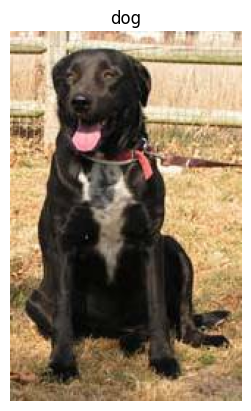

In [30]:
img = view_random_image(target_dir = '/content/drive/MyDrive/CatsAndDogsDS/cat_dog_split/test/',
                        target_class = "dog")


In [31]:
img

array([[[254, 215, 172],
        [244, 205, 162],
        [241, 204, 162],
        ...,
        [196, 175, 146],
        [187, 161, 134],
        [218, 193, 163]],

       [[239, 201, 162],
        [230, 192, 153],
        [227, 189, 152],
        ...,
        [167, 143, 117],
        [169, 143, 116],
        [207, 182, 152]],

       [[241, 205, 173],
        [232, 197, 165],
        [229, 194, 164],
        ...,
        [164, 140, 114],
        [182, 156, 129],
        [224, 197, 170]],

       ...,

       [[135, 116,  84],
        [122, 103,  71],
        [107,  84,  52],
        ...,
        [153, 135,  97],
        [135, 117,  79],
        [140, 122,  84]],

       [[126, 107,  75],
        [117,  98,  66],
        [117,  94,  62],
        ...,
        [171, 152, 112],
        [154, 135,  95],
        [142, 123,  83]],

       [[116,  97,  65],
        [136, 117,  85],
        [146, 123,  91],
        ...,
        [176, 157, 117],
        [164, 145, 105],
        [153, 134,  94]]

In [32]:
img/255

array([[[0.99607843, 0.84313725, 0.6745098 ],
        [0.95686275, 0.80392157, 0.63529412],
        [0.94509804, 0.8       , 0.63529412],
        ...,
        [0.76862745, 0.68627451, 0.57254902],
        [0.73333333, 0.63137255, 0.5254902 ],
        [0.85490196, 0.75686275, 0.63921569]],

       [[0.9372549 , 0.78823529, 0.63529412],
        [0.90196078, 0.75294118, 0.6       ],
        [0.89019608, 0.74117647, 0.59607843],
        ...,
        [0.65490196, 0.56078431, 0.45882353],
        [0.6627451 , 0.56078431, 0.45490196],
        [0.81176471, 0.71372549, 0.59607843]],

       [[0.94509804, 0.80392157, 0.67843137],
        [0.90980392, 0.77254902, 0.64705882],
        [0.89803922, 0.76078431, 0.64313725],
        ...,
        [0.64313725, 0.54901961, 0.44705882],
        [0.71372549, 0.61176471, 0.50588235],
        [0.87843137, 0.77254902, 0.66666667]],

       ...,

       [[0.52941176, 0.45490196, 0.32941176],
        [0.47843137, 0.40392157, 0.27843137],
        [0.41960784, 0

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


train_dir = '/content/drive/MyDrive/CatDogNewSplit/train'
test_dir = '/content/drive/MyDrive/CatDogNewSplit/test'


train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

# create a CNN model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# compile a model

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/5
625/625 [==============================] - 103s 161ms/step - loss: 0.6313 - accuracy: 0.6360 - val_loss: 0.5395 - val_accuracy: 0.7346
Epoch 2/5
625/625 [==============================] - 85s 136ms/step - loss: 0.5012 - accuracy: 0.7600 - val_loss: 0.5358 - val_accuracy: 0.7320
Epoch 3/5
625/625 [==============================] - 86s 138ms/step - loss: 0.4288 - accuracy: 0.8052 - val_loss: 0.5047 - val_accuracy: 0.7644
Epoch 4/5
625/625 [==============================] - 90s 145ms/step - loss: 0.3741 - accuracy: 0.8337 - val_loss: 0.5325 - val_accuracy: 0.7508
Epoch 5/5
625/625 [==============================] - 88s 141ms/step - loss: 0.3174 - accuracy: 0.8634 - val_loss: 0.5545 - val_accuracy: 0.7484


In [38]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [39]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
625/625 [==============================] - 94s 149ms/step - loss: 0.7409 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
625/625 [==============================] - 87s 140ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
625/625 [==============================] - 85s 136ms/step - loss: 0.6932 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
625/625 [==============================] - 82s 131ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
625/625 [==============================] - 82s 131ms/step - loss: 0.6932 - accuracy: 0.4957 - val_loss: 0.6932 - val_accuracy: 0.5000
